In [2]:
%matplotlib inline
import sys
sys.path.append('../src')
from params import params as P
import numpy as np
import patch_sampling
from parallel import ParallelBatchIterator
np.random.seed(1)
P.DATA_LEVEL=0

train_generator, validation_generator = patch_sampling.prepare_sampler()

Loaded configurations from (in order) ['../src/../config/default.ini', '../src/../config/notebook.ini']
OpenCV 2 NOT AVAILABLE, using skimage/scipy.ndimage instead
Loading validation masks


  0%|          | 0/9 [00:00<?, ?it/s]

Done in  6.13339090347
... is done
Loading train masks


100%|██████████| 9/9 [00:01<00:00,  4.02it/s]

Done in  1.74595999718
... is done


(3, 224, 224) 0.697476961761


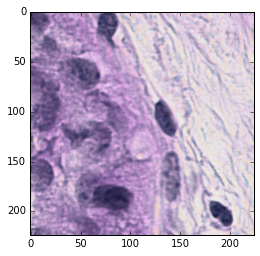

(3, 224, 224) 0.488374258916


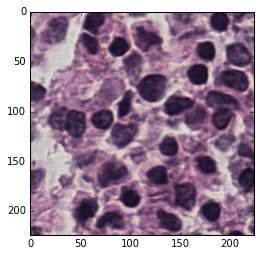

(3, 224, 224) 0.616505206817


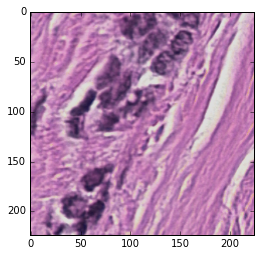

(3, 224, 224) 0.634438761708


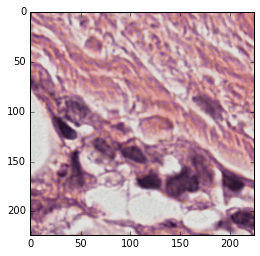

(3, 224, 224) 0.498409887518


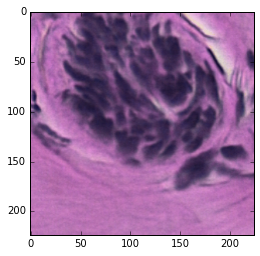

(3, 224, 224) 0.677929453911


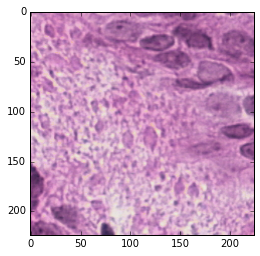

(3, 224, 224) 0.77586420842


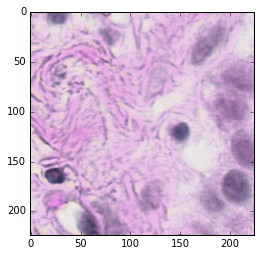

(3, 224, 224) 0.676571773391


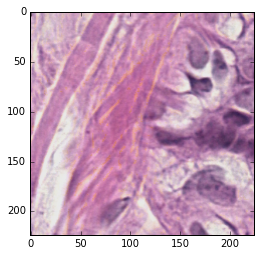

(3, 224, 224) 0.58477032206


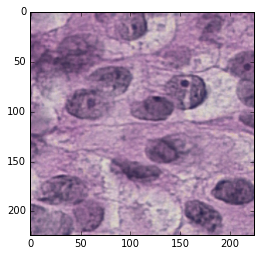

(3, 224, 224) 0.731584587508


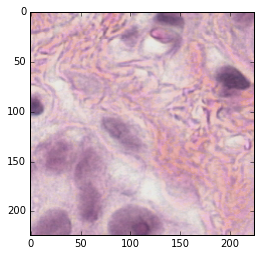

In [4]:
import matplotlib.pyplot as plt
import skimage
import util
import augment

X_train = [1]*10

X_val = [1]*1
val_gen = ParallelBatchIterator(validation_generator, X_val, ordered=False,
                                                batch_size=1,
                                                multiprocess=False,
                                                n_producers=2)

train_gen = ParallelBatchIterator(train_generator, X_train, ordered=False,
                                                batch_size=1,
                                                multiprocess=False,
                                                n_producers=2)

for batch in train_gen:
    images, labels = batch
    images = util.unzero_center(images, P.MEAN_PIXEL)
    
    im = images[0]
    im = augment.hsv_augment(im, 0.92, 0.88, 0.92)
    print im.shape, im.mean()
    plt.imshow(im.transpose(1,2,0))
    plt.show()
    